<a href="https://colab.research.google.com/github/theweird-kid/ML-Notes/blob/main/Basics/KaggleAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installing the kaggle Library
!pip install kaggle

Upload Kaggle.json file

In [ ]:
# Configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Data set

In [ ]:
#API to fetch dataset from Kaggle
!kaggle competitions download -c predict-the-building-safety-under-the-earthquake

  0% 0.00/138k [00:00<?, ?B/s]
100% 138k/138k [00:00<00:00, 65.9MB/s]


In [ ]:
# Extracting the compressed Dataset
from zipfile import ZipFile
dataset = '/content/predict-the-building-safety-under-the-earthquake.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [ ]:
# Import pandas
import pandas as pd


In [ ]:
# Make dataFrame from test.csv
testdata_df = pd.read_csv('/content/test.csv')

In [ ]:
# Check data
testdata_df.head()

,Column fy Mpa,Beam fy Mpa,Columns 1-3 I mm4*10^6,Columns 4-6 I mm4*10^6,Columns 1-3 A mm2,Columns 4-6 A mm2,Beam I mm4*10^6,Spans,Number of floors,Floor height m,...,Floor mass kg,Facade Load kN/m,PGA g,Magnitude,Distance to fault km,Period s,Final Dead Load,Final Live Load,soil_class__B,soil_class__C
0,355.0,355.0,5538.00,4221.000,34685.0,32053.0,231.30,4.0,4.0,3.0,...,17579.6280,4.0,0.354,6.50,15.82,0.216653,7.5,5.0,1.0,0.0
1,355.0,235.0,1119.00,0.000,21176.0,0.0,482.00,5.0,1.0,4.0,...,15968.5020,0.0,0.140,5.90,25.50,0.076358,9.0,6.0,0.0,1.0
2,235.0,235.0,10.33,6.062,3142.0,2534.0,1752.00,1.0,6.0,3.0,...,10531.4616,2.0,0.283,7.28,19.74,2.384245,8.0,12.0,0.0,1.0
3,355.0,235.0,637.20,0.000,17803.0,0.0,231.30,2.0,1.0,3.0,...,165958.2144,4.0,0.300,6.60,10.27,0.337537,21.0,7.0,1.0,0.0
4,275.0,235.0,1119.00,0.000,21176.0,0.0,13.17,1.0,2.0,3.0,...,4496.8770,0.0,0.150,6.20,13.91,0.180089,1.5,6.0,1.0,0.0


In [ ]:
testdata_df.shape

(325, 22)

In [ ]:
testdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Column fy Mpa           325 non-null    float64
 1   Beam fy Mpa             325 non-null    float64
 2   Columns 1-3 I mm4*10^6  325 non-null    float64
 3   Columns 4-6 I mm4*10^6  325 non-null    float64
 4   Columns 1-3 A mm2       325 non-null    float64
 5   Columns 4-6 A mm2       325 non-null    float64
 6   Beam I mm4*10^6         325 non-null    float64
 7   Spans                   325 non-null    float64
 8   Number of floors        325 non-null    float64
 9   Floor height m          325 non-null    float64
 10  Span width m            325 non-null    float64
 11  LLRS tributary width m  325 non-null    float64
 12  Floor mass kg           325 non-null    float64
 13  Facade Load kN/m        325 non-null    float64
 14  PGA g                   325 non-null    fl

In [ ]:
testdata_df.value_counts('Column fy Mpa')

,count
Column fy Mpa,
355.0,133
275.0,102
235.0,90


In [ ]:
# Importing Matplotlib and numpy
import numpy as np
import matplotlib.pyplot as plt


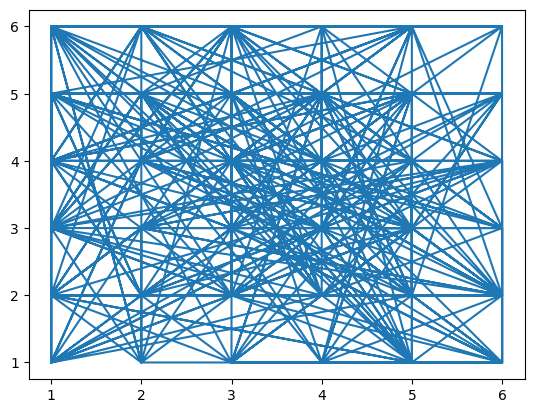

In [ ]:
plt.plot(testdata_df['Spans'], testdata_df['Number of floors'])
plt.show()

In [ ]:
testdata_df.corr()

,Column fy Mpa,Beam fy Mpa,Columns 1-3 I mm4*10^6,Columns 4-6 I mm4*10^6,Columns 1-3 A mm2,Columns 4-6 A mm2,Beam I mm4*10^6,Spans,Number of floors,Floor height m,...,Floor mass kg,Facade Load kN/m,PGA g,Magnitude,Distance to fault km,Period s,Final Dead Load,Final Live Load,soil_class__B,soil_class__C
Column fy Mpa,1.000000,0.547883,-0.050006,-0.067437,-0.023900,-0.073401,-0.042075,-0.020129,0.045418,0.050306,...,0.024463,-0.061916,-0.007328,-0.007805,0.043180,0.078367,0.122539,-0.074845,0.023550,-0.023550
Beam fy Mpa,0.547883,1.000000,-0.072179,-0.071916,-0.039932,-0.039800,-0.033456,-0.015010,0.014030,0.015784,...,-0.021232,-0.016237,0.006547,0.035468,0.018994,0.073353,0.051351,-0.057419,-0.002852,0.002852
Columns 1-3 I mm4*10^6,-0.050006,-0.072179,1.000000,0.960150,0.875697,0.785324,-0.041748,0.058574,0.243260,0.008909,...,-0.002237,0.019270,-0.055557,-0.064563,0.084856,-0.276364,-0.011205,0.075074,0.050750,-0.050750
Columns 4-6 I mm4*10^6,-0.067437,-0.071916,0.960150,1.000000,0.763186,0.870745,-0.032128,0.064369,0.372613,-0.014366,...,-0.008160,0.029505,-0.058003,-0.070593,0.084187,-0.141654,-0.027837,0.055470,0.031478,-0.031478
Columns 1-3 A mm2,-0.023900,-0.039932,0.875697,0.763186,1.000000,0.699253,-0.110667,0.023315,0.139933,0.035595,...,0.022938,-0.001260,-0.028189,-0.034108,0.047372,-0.479648,0.015831,0.072193,0.030241,-0.030241
Columns 4-6 A mm2,-0.073401,-0.039800,0.785324,0.870745,0.699253,1.000000,-0.047316,-0.002539,0.631460,-0.038387,...,-0.030330,0.009408,-0.013765,-0.032268,0.039258,-0.018129,-0.039255,0.036734,-0.003788,0.003788
Beam I mm4*10^6,-0.042075,-0.033456,-0.041748,-0.032128,-0.110667,-0.047316,1.000000,-0.034063,0.023987,0.009766,...,-0.010418,0.073482,0.045916,0.051722,-0.067737,-0.118998,0.056546,0.030769,0.002375,-0.002375
Spans,-0.020129,-0.015010,0.058574,0.064369,0.023315,-0.002539,-0.034063,1.000000,-0.090992,0.016214,...,0.471792,-0.001315,-0.073108,-0.043479,-0.016027,-0.035961,0.049805,-0.011699,0.035118,-0.035118
Number of floors,0.045418,0.014030,0.243260,0.372613,0.139933,0.631460,0.023987,-0.090992,1.000000,-0.085266,...,-0.095180,-0.024300,0.039882,0.045935,-0.022907,0.510865,-0.094724,0.051481,-0.022702,0.022702
Floor height m,0.050306,0.015784,0.008909,-0.014366,0.035595,-0.038387,0.009766,0.016214,-0.085266,1.000000,...,0.023719,-0.005878,-0.100868,-0.005704,0.027292,0.070579,0.076753,-0.015895,-0.061722,0.061722
